# K-Means

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('/home/mgabriel4/Documentos/GitHub/machine-learning/data/AmesHousing.csv')

## Pré-processamento dos dados

In [3]:
df = df.drop(columns=['Order', 'PID'])
df = df.drop(columns=['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu'])

num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

nulos = df.isnull().sum()
print("\nValores ausentes por coluna:")
print(nulos.head(100).to_string())
print(f"\nTotal de linhas após remoção: {len(df)}")


Valores ausentes por coluna:
MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt

/tmp/ipykernel_256829/311318374.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipykernel_256829/311318374.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [4]:
variaveis_ordinal = {
    'Exter Qual': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'Exter Cond': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'Bsmt Qual': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'Bsmt Cond': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'Heating QC': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'Kitchen Qual': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'Garage Qual': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'Garage Cond': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'Bsmt Exposure': {'No':1, 'Mn':2, 'Av':3, 'Gd':4},
    'BsmtFin Type 1': {'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
    'BsmtFin Type 2': {'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
    'Functional': {'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8},
}

for col, mapping in variaveis_ordinal.items():
    if col in df.columns:
        df[col] = df[col].map(mapping).fillna(0).astype(int)

variaveis_nominais = [
    'MS Zoning', 'Street', 'Lot Shape', 'Land Contour',
    'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
    'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
    'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation',
    'Heating', 'Central Air', 'Electrical', 'Garage Type', 'Garage Finish',
    'Paved Drive', 'Sale Type', 'Sale Condition'
]

df = pd.get_dummies(df, columns=variaveis_nominais)

print(df.head(10))


   MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
0           20         141.0     31770             6             5   
1           20          80.0     11622             5             6   
2           20          81.0     14267             6             6   
3           20          93.0     11160             7             5   
4           60          74.0     13830             5             5   
5           60          78.0      9978             6             6   
6          120          41.0      4920             8             5   
7          120          43.0      5005             8             5   
8          120          39.0      5389             8             5   
9           60          60.0      7500             7             5   

   Year Built  Year Remod/Add  Mas Vnr Area  Exter Qual  Exter Cond  ...  \
0        1960            1960         112.0           3           3  ...   
1        1961            1961           0.0           3           3  ...   
2

In [19]:
df['Target'] = pd.qcut(df['SalePrice'], q=3, labels=['Baixa', 'Média', 'Alta'])

df['Target'] = df['Target'].map({'Baixa':0, 'Média':1, 'Alta':2}).astype('int')

x = df[['Overall Qual', 'Year Built', 'Exter Qual', 'Bsmt Qual', 'Gr Liv Area', 'Full Bath', 'Kitchen Qual', 'Garage Cars', 'Garage Area', 'Garage Finish_Unf']]
y = df['Target'].values.astype('int')

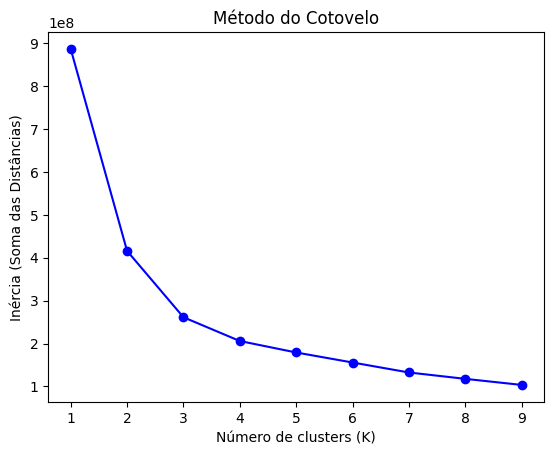

In [27]:
inertia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Inércia (Soma das Distâncias)')
plt.title('Método do Cotovelo')
plt.savefig('/home/mgabriel4/Documentos/GitHub/machine-learning/docs/classes/k-means/img/elbow_method.png')
plt.show()

In [14]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(x)

df['Cluster'].value_counts()


Cluster
2    1688
0     999
1     243
Name: count, dtype: int64

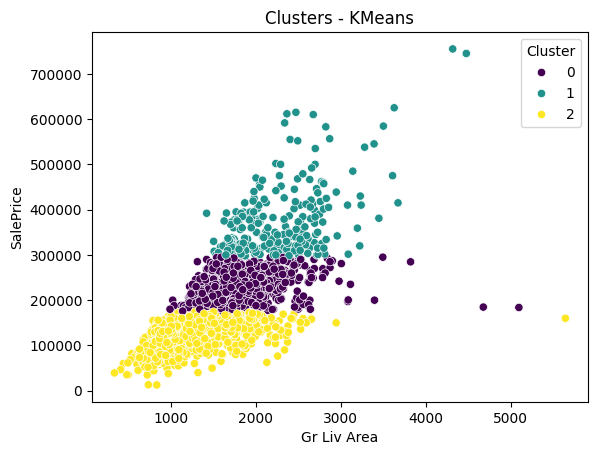

In [26]:
sns.scatterplot(
    data=df, x='Gr Liv Area', y='SalePrice',
    hue='Cluster', palette='viridis'
)
plt.title('Clusters - KMeans')
plt.savefig('/home/mgabriel4/Documentos/GitHub/machine-learning/docs/classes/k-means/img/kmeans_clusters.png')
plt.show()


In [30]:
df.groupby('Cluster')[x.columns].mean()

,Overall Qual,Year Built,Exter Qual,Bsmt Qual,Gr Liv Area,Full Bath,Kitchen Qual,Garage Cars,Garage Area,Garage Finish_Unf
Cluster,,,,,,,,,,
0,6.901902,1989.644645,3.698699,3.901902,1737.146146,1.922923,3.820821,2.134134,558.597598,0.176176
1,8.510288,1999.572016,4.325103,4.637860,2273.847737,2.065844,4.530864,2.773663,777.522634,0.053498
2,5.269550,1956.470972,3.087678,3.203791,1247.712678,1.283768,3.181280,1.404621,378.194313,0.711493


In [28]:
for cluster in range(3):
            subset = df[df['Cluster'] == cluster]
            counts = subset['Target'].value_counts().sort_index()
            print(f"\nCluster {cluster}:")
            print(f"Baixa: {counts.get(0, 0)}")
            print(f"Média: {counts.get(1, 0)}")
            print(f"Alta: {counts.get(2, 0)}")


Cluster 0:
Baixa: 0
Média: 273
Alta: 726

Cluster 1:
Baixa: 0
Média: 0
Alta: 243

Cluster 2:
Baixa: 981
Média: 707
Alta: 0
